In [5]:
URL = "https://www.youtube.com/watch?v=y316Fh2Qlzk"

In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
import random

In [7]:
# 웹드라이버 설정
browser = webdriver.Chrome()
browser.get(URL)  # 유튜브 비디오 URL 입력

time.sleep(2)  # 페이지 로딩 대기

# 댓글 섹션까지 스크롤
browser.find_element(By.TAG_NAME, 'body').send_keys(Keys.PAGE_DOWN)
time.sleep(2)  # 동적 로딩 대기

In [8]:
# 스크롤 다운하여 모든 댓글 로드
last_height = browser.execute_script("return document.documentElement.scrollHeight")
while True:
    browser.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(random.uniform(1.5, 3.0))  # 로딩과 다양성을 위해 랜덤 대기 시간 적용
    new_height = browser.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [9]:
# 댓글 요소 수집
comments = browser.find_elements(By.XPATH, '//*[@id="content-text"]')
usernames = browser.find_elements(By.XPATH, '//*[@id="author-text"]')
likes = browser.find_elements(By.XPATH, '//*[contains(@id, "vote-count-middle")]')
#dates = browser.find_elements(By.XPATH, '//*[@id="header-author"]//yt-formatted-string/a')
#reply_counts = browser.find_elements(By.XPATH, '//ytd-comment-thread-renderer//span[@id="vote-count-middle"]/following-sibling::span')

# DataFrame 생성
data = {
    # '작성일': [date.text for date in dates],
    '사용자이름': [username.text for username in usernames],
    'comment': [comment.text for comment in comments],
    '좋아요수': [like.text if like.text != '' else '0' for like in likes],
    # '답글수': [reply.text.split()[0] if reply.text != '' else '0' for reply in reply_counts]
}
df = pd.DataFrame(data)

# DataFrame 확인
print(df)


                사용자이름                                            comment 좋아요수
0    @user-xf5os8nn3i  신이시여\n우리 유작가님께 200살의 수명을 주십시오\n우리곁에 오래오래 함께 할수...  132
1    @user-um3lv9ce5v  유시민작가님~~유튜브 어디든\n어준총수 겸공이든 매불쇼든\n어디든 좀 나와서 현상황...   16
2         @helenk7619  조 수진 변호사님과 유 시민 작가님, 더욱 존경합니다. 지리의 힘을 권유해주셔서 또...  222
3    @user-kr6nx5no2s  유시민 작가님이 그 자리에 그저 계셔주신 것만으로도 든든합니다. 감사합니다.\n항상...  140
4     @danielle-wo5rx             언제들어도 재미있는 지리이야기!\n유작가님과 함께라서 더욱 즐겁습니다  114
..                ...                                                ...  ...
256  @user-ur9hr9pe7m                                           어휴 적폐들 ㅉ    0
257  @user-cm2ci6tx1r                                   조수진 별로 . 느낌이 별로.    2
258          @Seo.S.W                                      기회주의자 조변 납시었네    0
259     @brandonkim76                                2찍이들 유튭채널에선 이런거 안해요    0
260          @bocobox  조수진 변호사 이분 성범죄자 변호 하신분은 결이 맞지 않는데, 계속 나오시니 의하하네요.    0

[261 rows x 3 columns]


In [10]:
# pip install wordcloud

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

# plt 한국어폰트설정맥북환경 애플고딕
rc('font', family='AppleGothic')

In [12]:
df['comment'] = df['comment'].str.replace('[^가-힣]', ' ', regex = True)
df['comment']

0       신이시여 우리 유작가님께    살의 수명을 주십시오 우리곁에 오래오래 함께 할수 있도록
1      유시민작가님  유튜브 어디든 어준총수 겸공이든 매불쇼든 어디든 좀 나와서 현상황에 ...
2      조 수진 변호사님과 유 시민 작가님  더욱 존경합니다  지리의 힘을 권유해주셔서 또...
3      유시민 작가님이 그 자리에 그저 계셔주신 것만으로도 든든합니다  감사합니다  항상 ...
4                  언제들어도 재미있는 지리이야기  유작가님과 함께라서 더욱 즐겁습니다
                             ...                        
256                                             어휴 적폐들  
257                                     조수진 별로   느낌이 별로 
258                                        기회주의자 조변 납시었네
259                                   찍이들 유튭채널에선 이런거 안해요
260    조수진 변호사 이분 성범죄자 변호 하신분은 결이 맞지 않는데  계속 나오시니 의하하네요 
Name: comment, Length: 261, dtype: object

In [13]:
# pip install soynlp

In [14]:
from soynlp.noun import LRNounExtractor_v2
import pandas as pd

# 모든 댓글을 하나의 문자열로 결합
comments_string = df['comment'].str.cat(sep=' ')

# soynlp 명사 추출기 인스턴스 생성
noun_extractor = LRNounExtractor_v2()
nouns = noun_extractor.train_extract([comments_string])  # 배열 형태로 입력

# 추출된 명사를 다시 하나의 문자열로 결합
nouns_string = ' '.join(nouns.keys())  # 추출된 명사들의 key만 사용

# 결과 출력
nouns_string

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 2439 from 1 sents. mem=0.086 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=3458, mem=0.090 Gb
[Noun Extractor] batch prediction was completed for 939 words
[Noun Extractor] checked compounds. discovered 16 compounds
[Noun Extractor] postprocessing detaching_features : 271 -> 267
[Noun Extractor] postprocessing ignore_features : 267 -> 253
[Noun Extractor] postprocessing ignore_NJ : 253 -> 253
[Noun Extractor] 253 nouns (16 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.093 Gb                    
[Noun Extractor] 35.86 % eojeols are covered


'조수진변호사님 유시민작가님 알릴레오북스 다이아몬드 남아프리카 알릴레오 지리학과 풍수지리 유작가님 변호사님 실크로드 프로그램 연구내용 않았을까 총균쇠 다음주 과학자 월계수 사람들 한국인 작가님 어르신 외계인 교수님 효율성 가축화 도서관 페이지 우리곁 유튜브 알북스 우리집 이야기 컨텐츠 조선사 벽돌책 구운몽 유시민 오래전 화이팅 칠면조 목소리 두꺼워 언제나 유전자 인종별 누군가 선생님 고기후 생각 자리 호수 너희 지구 이해 기대 재미 미소 북스 흥미 언젠 문제 주제 공부 농사 도전 살아 감사 사람 국가 흑인 한국 지역 진화 중요 태어 시작 기억 기분 느낌 농경 환경 철학 수진 말씀 한분 부분 세분 세상 시간 벽돌 알북 내용 질문 영향 자신 책들 성공 인간 얼굴 유럽 욕심 백인 경험 발달 무엇 중국 시청 시도 복습 유익 대륙 세계 강릉 방송 오랫 답답 차이 태도 정보 위치 지배 시대 붕괴 역사 거주 정주 오늘 다음 설명 완독 사건 위안 만년 희망 불편 지식 오래 영어 한글 정치 과거 추천 뿌듯 발전 건강 엄청 영상 결정 좋아 연구 빙하 나라 양쪽 우연 국민 존경 기회 때문 나이 댓글 기후 채널 평소 옛날 본능 부탁 기원 알게 국한 소개 이번 지금 그것 요소 정도 원서 가장 많이 지나 인류 든든 가능 관련 필요 이걸 유명 로마 인상 지리 우리 최고 응원 말 내 제 쇠 뒤 책 년 안 것 백 배 원 힘 분 손 등 편 삶 돈 점 잠 적 결 섬 못 끝 파 깨 답 참 갓 독 선 귀 새 반 수 중 번 집 부 별 대 담 또 꼭 왜 종 강 준 고기후연구 우리나라 지리이야기 환경결정 유럽사람들 백인지배 인류역사 기대기대 유럽사람 유럽지역'

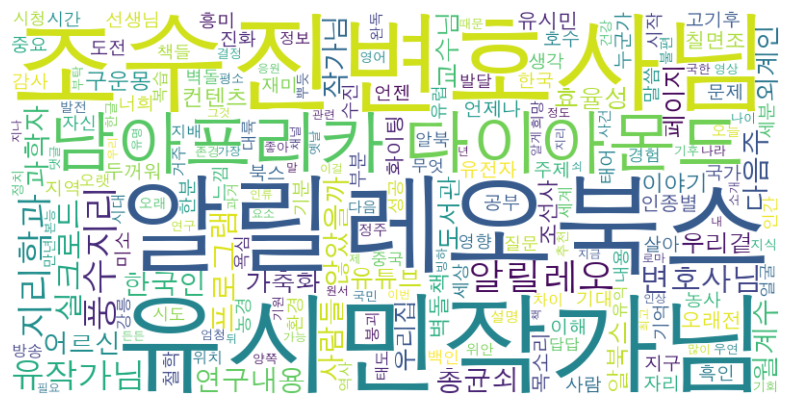

In [18]:
# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path = '/System/Library/Fonts/AppleGothic.ttf', # 애플고딕 폰트 사용(맥북환경에서 한국어 폰트 사용시 필수)
    width = 800, height = 400, background_color ='white').generate(nouns_string)

# 워드 클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# !pip install konlpy

In [ ]:
# 자바 버전 이슈로 실행이 안됨


# from konlpy.tag import Okt
# import pandas as pd

# # Okt 형태소 분석기 인스턴스 생성
# okt = Okt()


# # 모든 댓글을 하나의 문자열로 결합
# comments_string = df['comment'].str.cat(sep=' ')

# # 명사 추출
# nouns = okt.nouns(comments_string)

# # 추출된 명사를 다시 하나의 문자열로 결합
# nouns_string = ' '.join(nouns)


# # 워드 클라우드 생성
# wordcloud = WordCloud(font_path = '/System/Library/Fonts/AppleGothic.ttf',
#                       width = 800,
#                       height = 400, 
#                       background_color ='white').generate(nouns_string)

# # 워드 클라우드 표시
# plt.figure(figsize=(100, 50))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()